# 1. PMF

In [60]:
import math
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [19]:
l = []
for i in range(10000):
    l.append(random.randint(1,6))

In [ ]:
# analysing values with counts
random_variable = pd.Series(l).value_counts().sort_index()
random_variable

1    1682
2    1681
3    1624
4    1692
5    1638
6    1683
Name: count, dtype: int64

In [22]:
probabilities = random_variable / 10000
probabilities

1    0.1682
2    0.1681
3    0.1624
4    0.1692
5    0.1638
6    0.1683
Name: count, dtype: float64

<Axes: title={'center': 'PMF Distribution Plot of Die roll'}, xlabel='Dice events', ylabel='probability of dice events'>

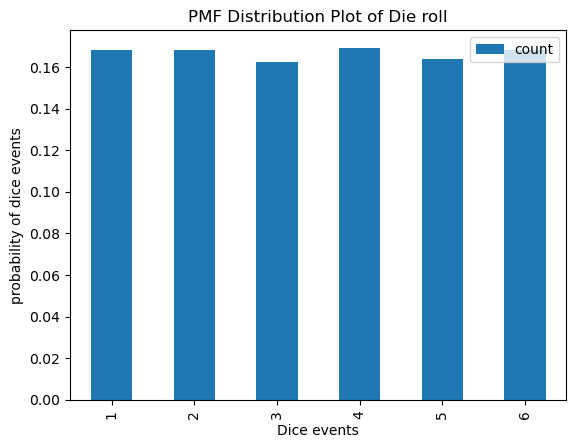

In [23]:
pd.DataFrame(probabilities).plot(kind='bar', title = 'PMF Distribution Plot of Die roll', xlabel = 'Dice events', ylabel = 'probability of dice events')

### Now taking PMF for the sum of two dice

In [ ]:
l2 = []
for i in range(10000):
   #dice 1
    a = random.randint(1,6)
   # dice 2
    b = random.randint(1,6)
    l2.append(a+b)

In [ ]:
# analysing values with counts
random_variable2 = pd.Series(l2).value_counts().sort_index()
random_variable2

2      293
3      584
4      825
5     1159
6     1359
7     1632
8     1366
9     1117
10     818
11     548
12     299
Name: count, dtype: int64

In [27]:
probabilities2 = random_variable2 / 10000
probabilities2

2     0.0293
3     0.0584
4     0.0825
5     0.1159
6     0.1359
7     0.1632
8     0.1366
9     0.1117
10    0.0818
11    0.0548
12    0.0299
Name: count, dtype: float64

<Axes: title={'center': 'PMF Distribution Plot of Sum of two dice roll'}, xlabel='outcomes', ylabel='Probabilities of outcome'>

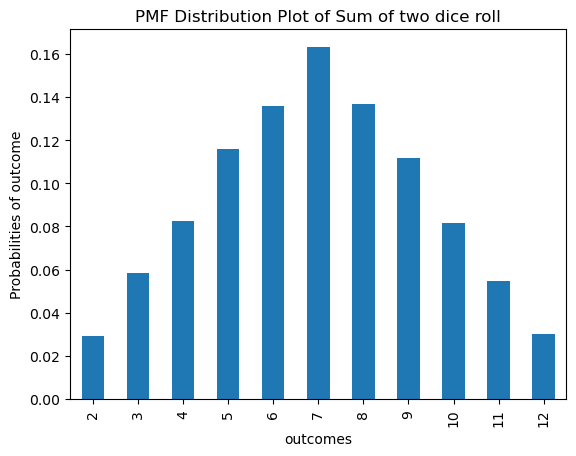

In [28]:
pd.Series(probabilities2).plot(kind = 'bar', title = 'PMF Distribution Plot of Sum of two dice roll', xlabel = 'outcomes', ylabel = 'Probabilities of outcome')

# 2. CDF

In [ ]:
# again taking a dice throw experiment
probabilities

1    0.1682
2    0.1681
3    0.1624
4    0.1692
5    0.1638
6    0.1683
Name: count, dtype: float64

In [30]:
np.cumsum(probabilities)

1    0.1682
2    0.3363
3    0.4987
4    0.6679
5    0.8317
6    1.0000
Name: count, dtype: float64

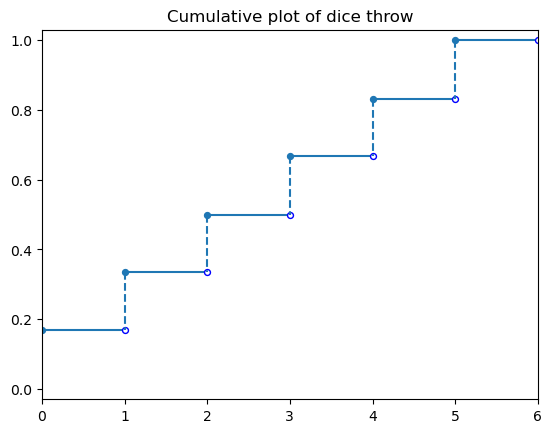

In [83]:
x = (probabilities.index).insert(0,0)
y = np.cumsum(probabilities)
plt.hlines(y=y, xmax=x[:-1], xmin=x[1:], zorder=1)
plt.vlines(x=x[1:-1], ymax=y[:-1], ymin=y[1:], linestyles='--')
plt.scatter(x[1:], np.array(y), s=18, edgecolors='blue', color='white')
plt.scatter(x[:-1], np.array(y), s=18)
plt.xlim(x[0], x[-1])
plt.ylim(-0.03,1.03)
plt.title('Cumulative plot of dice throw')
plt.show()

<Axes: title={'center': 'Cumulative Distribution Plot of Die roll'}, xlabel='Dice events', ylabel='probability of dice events'>

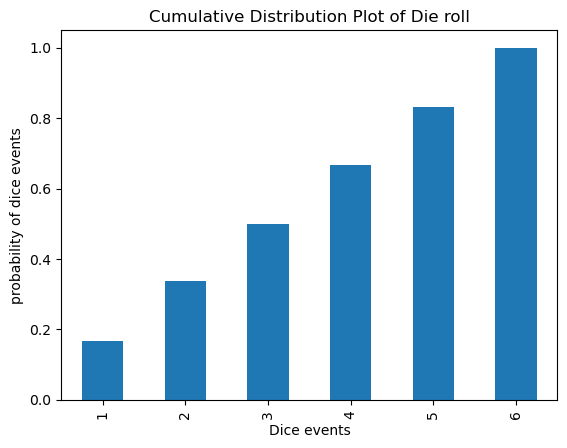

In [31]:
np.cumsum(probabilities).plot(kind='bar', title = 'Cumulative Distribution Plot of Die roll', xlabel = 'Dice events', ylabel = 'probability of dice events')

In [ ]:
# sum of two dice thrown
probabilities2

2     0.0293
3     0.0584
4     0.0825
5     0.1159
6     0.1359
7     0.1632
8     0.1366
9     0.1117
10    0.0818
11    0.0548
12    0.0299
Name: count, dtype: float64

<Axes: title={'center': 'Cumulative Plot of Sum of two dice roll'}, xlabel='outcomes', ylabel='Probabilities of outcome'>

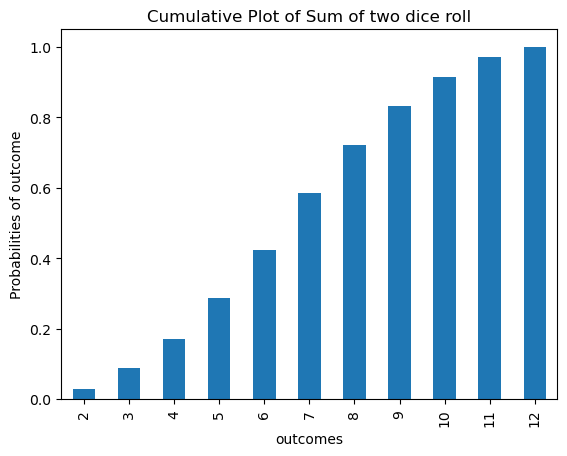

In [33]:
np.cumsum(probabilities2).plot(kind='bar', title = 'Cumulative Plot of Sum of two dice roll', xlabel = 'outcomes', ylabel = 'Probabilities of outcome')

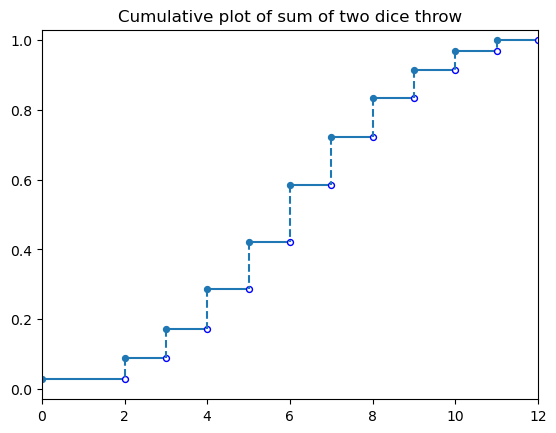

In [84]:
x = (probabilities2.index).insert(0,0)
y = np.cumsum(probabilities2)
plt.hlines(y=y, xmax=x[:-1], xmin=x[1:], zorder=1)
plt.vlines(x=x[1:-1], ymax=y[:-1], ymin=y[1:], linestyles='--')
plt.scatter(x[1:], np.array(y), s=18, edgecolors='blue', color='white')
plt.scatter(x[:-1], np.array(y), s=18)
plt.xlim(x[0], x[-1])
plt.ylim(-0.03,1.03)
plt.title('Cumulative plot of sum of two dice throw')
plt.show()

## PDF and CDF use in real world

In [8]:
import seaborn as sns
from pydataset import data
import matplotlib.pyplot as plt

In [5]:
df = data('iris')
df.sample(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
141,6.7,3.1,5.6,2.4,virginica
149,6.2,3.4,5.4,2.3,virginica
112,6.4,2.7,5.3,1.9,virginica
111,6.5,3.2,5.1,2.0,virginica
51,7.0,3.2,4.7,1.4,versicolor


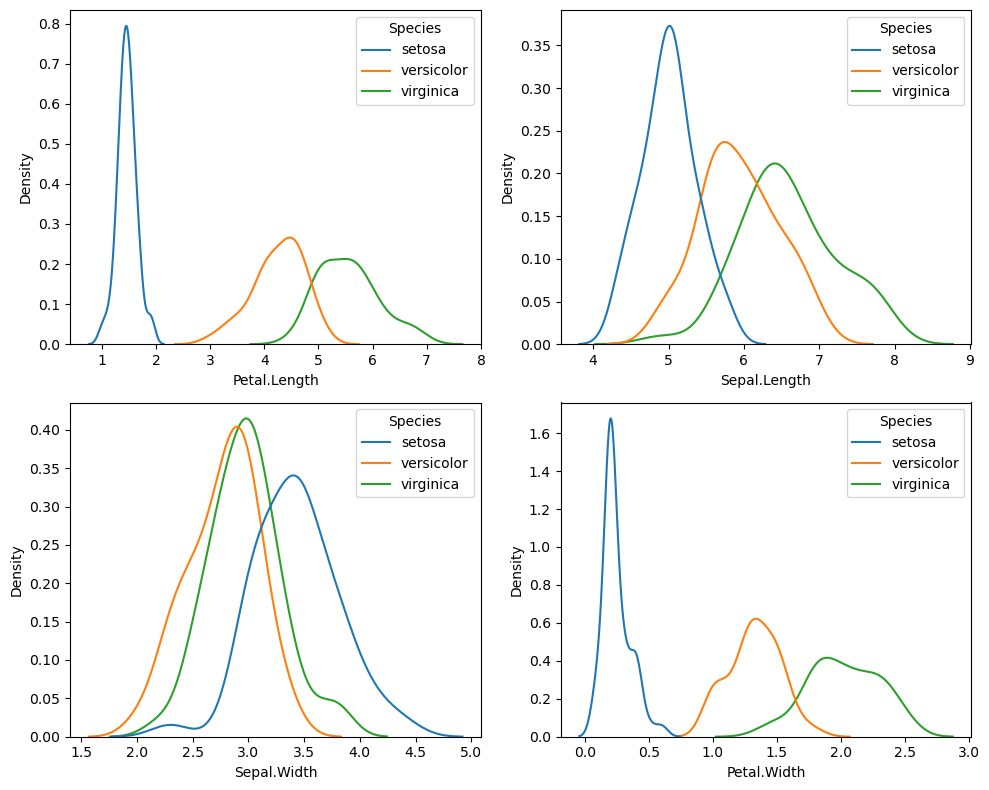

In [17]:
fig, ax = plt.subplots(2,2, figsize=(10,8))
sns.kdeplot(data = df, x='Petal.Length', hue='Species', ax = ax[0,0])
sns.kdeplot(data = df, x='Sepal.Length', hue='Species', ax = ax[0,1])
sns.kdeplot(data = df, x='Sepal.Width', hue='Species', ax = ax[1,0])
sns.kdeplot(data = df, x='Petal.Width', hue='Species', ax = ax[1,1])
plt.tight_layout(); plt.show();

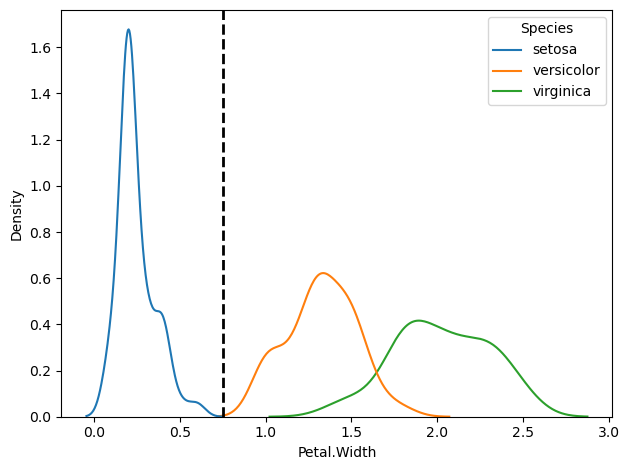

In [71]:
sns.kdeplot(data = df, x='Petal.Width', hue='Species')
plt.axvline(x=0.75, color='black', linestyle='--', linewidth=2)
plt.tight_layout(); plt.show();

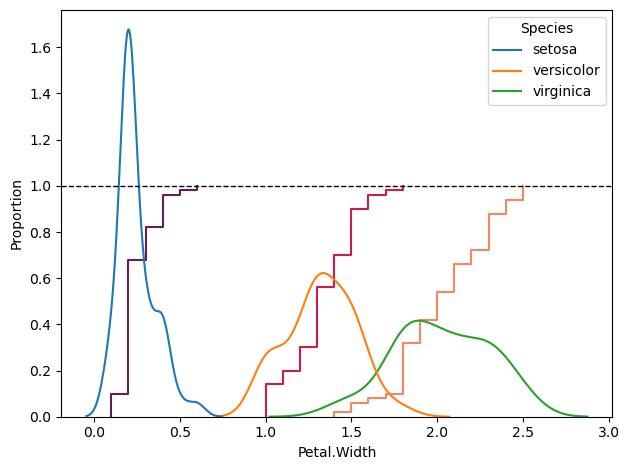

In [67]:
sns.ecdfplot(data = df, x='Petal.Width', hue='Species', palette='rocket')
sns.kdeplot(data = df, x='Petal.Width', hue='Species')
plt.axhline(y=1, color='black', linestyle='--', linewidth=1)
plt.tight_layout(); plt.show();

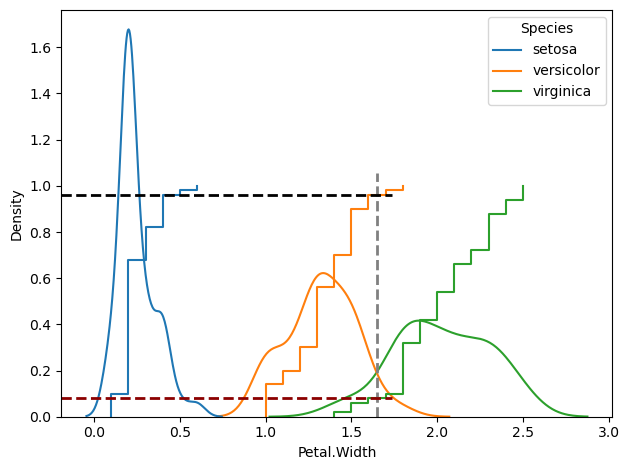

In [81]:
sns.kdeplot(data = df, x='Petal.Width', hue='Species')
sns.ecdfplot(data = df, x='Petal.Width', hue='Species')
plt.axvline(x=1.65, ymin=0, ymax=.6, color='grey', linestyle='--', linewidth=2)
plt.axhline(y = 0.96, xmax=0.6, color='black', linestyle='--', linewidth=2)
plt.axhline(y = 0.08, xmax=0.6, color='darkred', linestyle='--', linewidth=2)
plt.tight_layout(); plt.show();

- Let say we make a rule based on PDF that,  

    `0.75 < Petal.Width < 1.65 => versicolor`, 

    and `Petal.width > 1.65 => Virginica`

- What CDF told us that how much accurate we are in this rule.

    black dashed line indicates that, `96% versicolor` flowers are below 1.65 petal.width.

    darkred dashed line indicates that, only `8% virginica` flowers are below 1.65 petal.width

“The PDF helps us identify likely outcomes in data for making decisions, while the CDF quantifies how confident or accurate those decisions are by giving cumulative probabilities.”


In [84]:
df2 = sns.load_dataset('titanic')
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


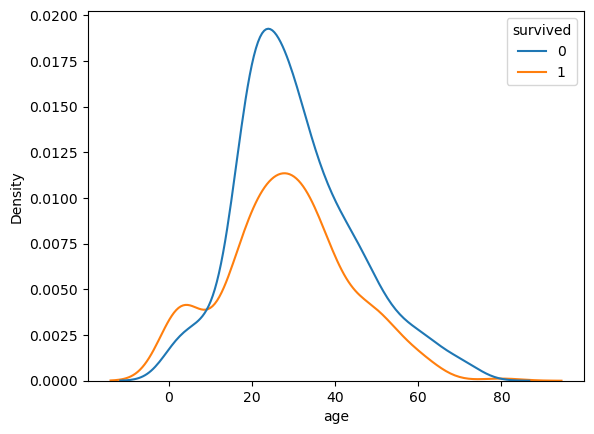

In [97]:
sns.kdeplot(data=df2, x='age',hue='survived')
plt.show()

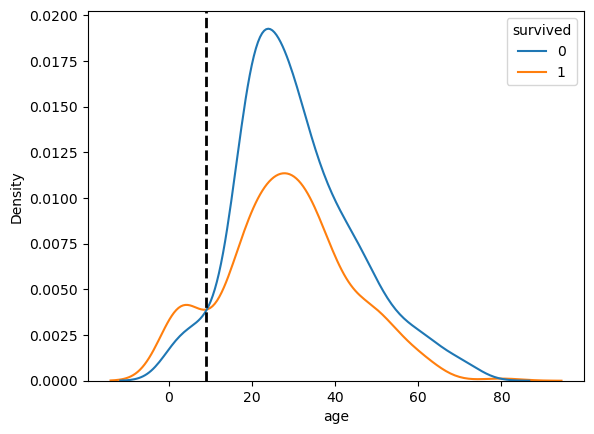

In [95]:
sns.kdeplot(data=df2, x='age',hue='survived')
plt.axvline(x=9, color='black', linestyle='--', linewidth=2)
plt.show()

In [1]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
df['age'].skew()

0.38910778230082704

In [3]:
df['age'].mean()

29.69911764705882

In [5]:
df['age'].mean() - 3* df['age'].std(), df['age'].mean() + 3* df['age'].std()

(-13.880374349943303, 73.27860964406094)

In [8]:
df.query("age>73")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
630,1,1,male,80.0,0,0,30.000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,74.0,0,0,7.775,S,Third,man,True,NaN,Southampton,no,True


## If we have a random variable or in the dataset any column how we can find particular column is NORMAL or not?

There are 3–4 ways we can find whether data is normal or not.

1. VISUAL INSPECTION: 

    - We can PLOT a graph “HISTOGRAM” or “DENSITY PLOT”. And if the histogram looks like NORMAL DISTRIBUTION “BELL SHAPED CURVE” then there is a possibility data is normally distributed. Or we get a density plot that also looks like bell shaped curve we can say the data is normal.

2. QQ PLOT (Quantile Quantile Plot)

    - It is a “SPECIAL PLOT” which is used to identify “DISTRIBUTION”
    - A normal probability plot plots the “observed data” against the “expected values” of a normal distribution. If the data points fall along a straight line, the distribution is likely to be normal.

3. STATISTICAL TEST

    - There are different tests like “The Anderson Darling Test”, and “Shapiro-Wilk-Test” by using this test with the help of “P-VALUE” we figure out whether the distribution we have is Normal or not.
    - A P-VALUE less than the significance level(usually 0.05) suggests that the data is not normal.

### QQ plot

The quantile-quantile (q-q) plot is a graphical technique for determining if two data sets come from populations with a common distribution.

A q-q plot is a plot of the quantiles of the first data set against the quantiles of the second data set. By a quantile, we mean the fraction (or percent) of points below the given value. That is, the 0.3 (or 30%) quantile is the point at which 30% percent of the data fall below and 70% fall above that value.

A 45-degree reference line is also plotted. If the two sets come from a population with the same distribution, the points should fall approximately along this reference line. The greater the departure from this reference line, the greater the evidence for the conclusion that the two data sets have come from populations with different distributions.

The advantages of the q-q plot are:

- The sample sizes do not need to be equal.

- Many distributional aspects can be simultaneously tested. For example, shifts in location, shifts in scale, changes in symmetry, and the presence of outliers can all be detected from this plot. For example, if the two data sets come from populations whose distributions differ only by a shift in location, the points should lie along a straight line that is displaced either up or down from the 45-degree reference line.

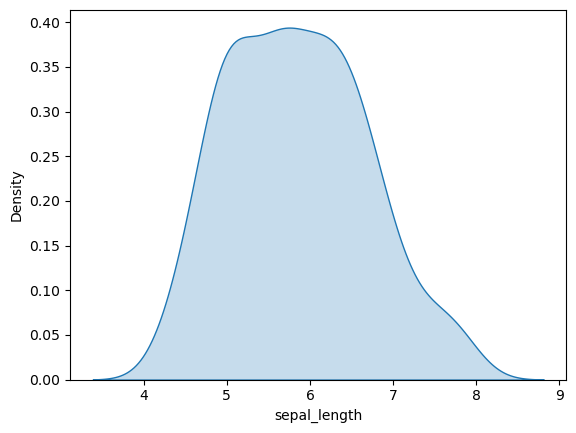

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df1 = sns.load_dataset('iris')
sns.kdeplot(df1['sepal_length'], fill=True)
plt.show()

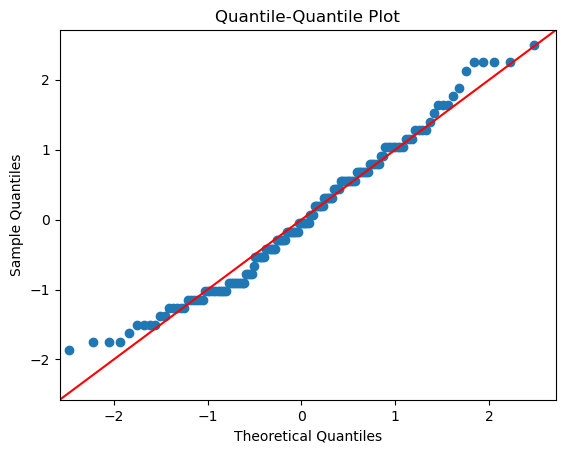

In [31]:
import statsmodels.api as sm

fig = sm.qqplot(df1['sepal_length'],line='45', fit=True)

plt.title("Quantile-Quantile Plot"); plt.show();

<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*AMIiVNxMdvW98rHrUu4vxw.jpeg" width='50%'><img>

<img src='https://miro.medium.com/v2/resize:fit:720/format:webp/1*aE4oVsOoz-TQxUTIOPti1g.png'></img>

<img src='https://miro.medium.com/v2/resize:fit:720/format:webp/1*yiZGG5IIj7ljitt8AJFopg.png'></img>

<img src='https://miro.medium.com/v2/resize:fit:720/format:webp/1*cglRD3hoOitiCIGZhDr-HA.png'></img>

<img src = 'https://miro.medium.com/v2/resize:fit:720/format:webp/1*YtidhzyY8VtL4-QE9ce3QQ.png'></img>

<img src='https://im.ft-static.com/content/images/f46922e0-be2e-11e2-bb35-00144feab7de.jpg' width='50%'></img>

**Excess kurtosis** is a statistical measure that describes the "tailedness" of a distribution compared to a normal distribution. 

- A normal distribution has a kurtosis of 3, and  
$$\large \text{excess kurtosis = kurtosis value - 3}$$ 

It indicates whether a distribution has heavier or lighter tails than a normal distribution. 


1. **Normal Distribution (Mesokurtic)**: A normal distribution has an excess kurtosis of 0. 

    e.g., Age distribution

2. **Leptokurtic Distribution (Positive Excess Kurtosis)**: A distribution with fatter tails than a normal distribution has a positive excess kurtosis. This means there's a higher probability of extreme values, both positive and negative. 

    e.g., Stock Market Returns (especially during crises like the 2008 financial crash) often exhibit leptokurtosis because extreme gains or losses occur more frequently than predicted by a normal distribution.

3. **Platykurtic Distribution (Negative Excess Kurtosis)**: A distribution with thinner tails than a normal distribution has a negative excess kurtosis. This means there are fewer extreme values compared to a normal distribution. 

    e.g., Human Height Distribution (most people cluster around the average, with very few extreme outliers).
In essence: Excess kurtosis helps us understand how much a distribution deviates from a normal distribution, specifically in terms of the presence and thickness of its tails. 

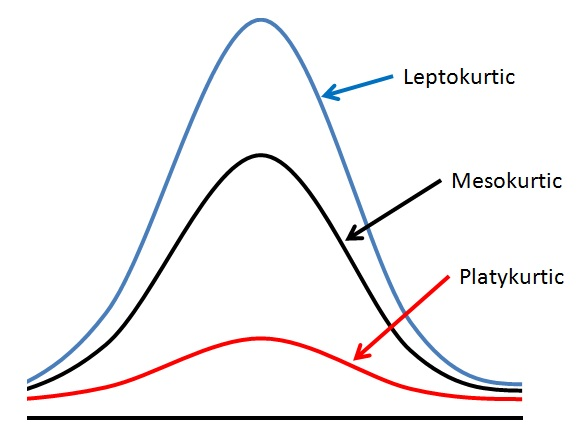

## Can qq plot only used for normal distribution?
No.

As we know QQ PLOT explains the distribution of two random variables X, Y. So our X can be any distribution. It could be “NORMAL”, “PARETO”, “UNIFORM”, or “LOG NORMAL”.

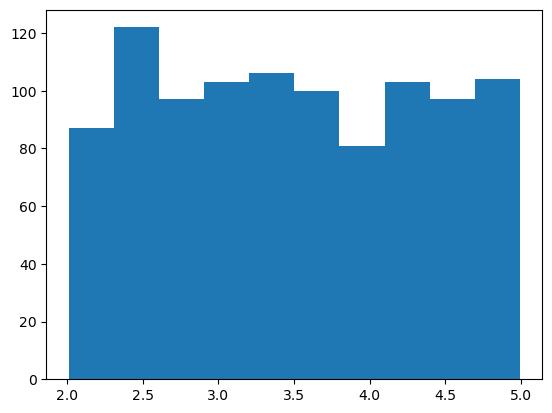

In [ ]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate a set of random data
x = np.random.uniform(low=2, high=5, size=1000)

plt.hist(x)
plt.show()

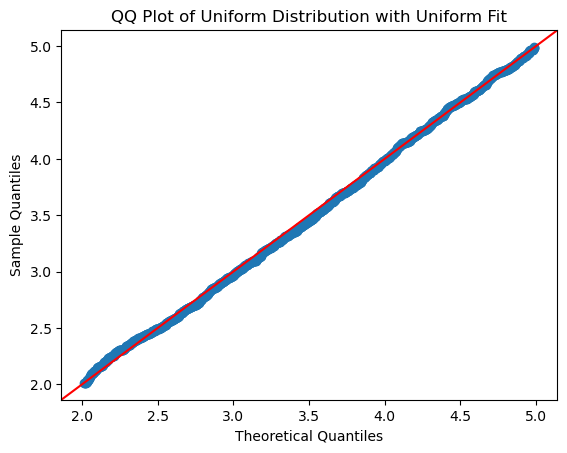

In [ ]:
params = stats.uniform.fit(x)
dist = stats.uniform(loc=params[0], scale=params[1])
#when we want to apply normal distribution it is inbuild so we do not need to mention, but when we have to apply other distribution we need to mention 

# Create a QQ plot of the data using the uniform distribution
fig = sm.qqplot(x, dist=dist, line='45')

# Add a title and labels to the plot
plt.title('QQ Plot of Uniform Distribution with Uniform Fit')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()

## Central Limit Thoerem

The Central Limit Theorem states that when you take sufficiently large samples from any population and calculate their means, the distribution of these sample means will approximate a normal distribution, regardless of the underlying population's distribution.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
num_samples = 1000
sample_size = 30

samples = []

for i in range(num_samples):
    sample = np.random.uniform(2,3, size=sample_size)
    samples.append(sample)

samples = np.array(samples)

print("Shape  = ", samples.shape)
print("Samples = ", samples[: 1])

Shape  =  (1000, 30)
Samples =  [[2.54278877 2.8396675  2.10823162 2.2057951  2.65638141 2.11729917 2.16477634
  2.6771336  2.26804464 2.18173245 2.93519177 2.91389601 2.63800825 2.61122344
  2.35917677 2.46462444 2.07561072 2.24147313 2.86851685 2.78539021 2.75696959
  2.71661495 2.99575943 2.17912962 2.54163584 2.10220983 2.72088376 2.45680649
  2.55615905 2.71791523]]


In [55]:
sample_means = np.mean(samples, axis=1)
print(sample_means[:10])
print("Shape: ", sample_means.shape)

[2.48285368 2.55567533 2.4687496  2.51783514 2.37944382 2.50396721 2.49266552
 2.47327574 2.53457818 2.472125  ]
Shape:  (1000,)


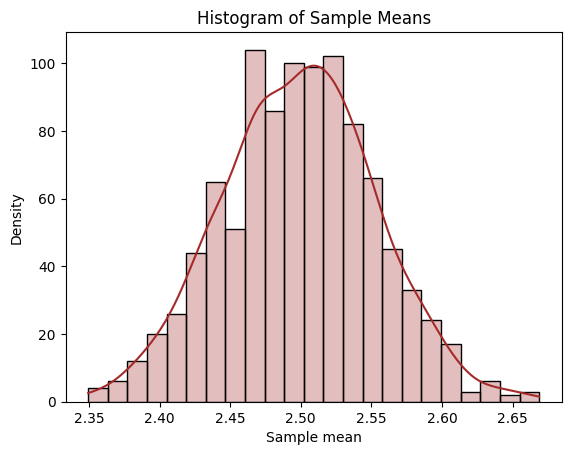

In [56]:
import seaborn as sns
sns.histplot(sample_means, kde=True, color='brown', edgecolor='black', alpha=0.3)
plt.xlabel('Sample mean')
plt.ylabel('Density')
plt.title('Histogram of Sample Means')
plt.show()

In [57]:
from scipy.stats import skew
print(skew(sample_means, axis=0, bias=True))

0.03876574240994599


In [61]:
print(np.mean(sample_means), np.var(sample_means))

2.4988531449584763 0.0028881440313737457


In [63]:
print("Population variance = ",((3-2)**2/12))
print("sample variance = ",((3-2)**2/12)/30)

Population variance =  0.08333333333333333
sample variance =  0.0027777777777777775


In [66]:
num_samples = 1000
sample_size = 50
lambda_param = 2

samples = []

for i in range(num_samples):
    sample = np.random.exponential(scale=1/lambda_param, size=sample_size)
    samples.append(sample)

samples = np.array(samples)

print("Shape  = ", samples.shape)
print("Samples = ", samples[: 1])

Shape  =  (1000, 50)
Samples =  [[6.82839700e-01 2.34851145e+00 1.31228907e-01 9.28536319e-01 1.92253654e-03
  6.08121854e-02 7.41754551e-02 1.22346295e-01 1.69466907e-01 1.69453400e-01
  4.03650366e-01 7.74748282e-01 1.65116586e-03 1.08510446e-02 2.95010687e-01
  4.53381841e-01 3.32567796e-02 1.90874277e-01 2.01261082e-01 1.45089905e-01
  1.96756452e+00 1.17511900e-01 1.91151917e-02 1.19515431e-01 1.61124660e-01
  9.72904093e-02 3.31250658e-01 1.68251373e-01 2.96152155e-02 1.30417491e+00
  1.19363893e+00 2.13866119e-01 4.20502612e-01 5.26236345e-01 1.14542137e+00
  7.05560439e-01 2.48782700e-01 2.15426512e-02 3.67842116e-02 1.72692065e-02
  4.60678020e-01 1.49363403e-01 3.05417415e-01 1.26375527e-01 7.52431669e-01
  5.12549919e-02 3.33870231e-01 1.10560362e+00 5.80581459e-01 6.39949909e-01]]


In [67]:
sample_means = np.mean(samples, axis=1)
print(sample_means[:10])
print("Shape: ", sample_means.shape)

[0.41099227 0.65787615 0.51726498 0.4358365  0.38816234 0.46685095 0.41134894
 0.57401851 0.59925261 0.50891595]
Shape:  (1000,)


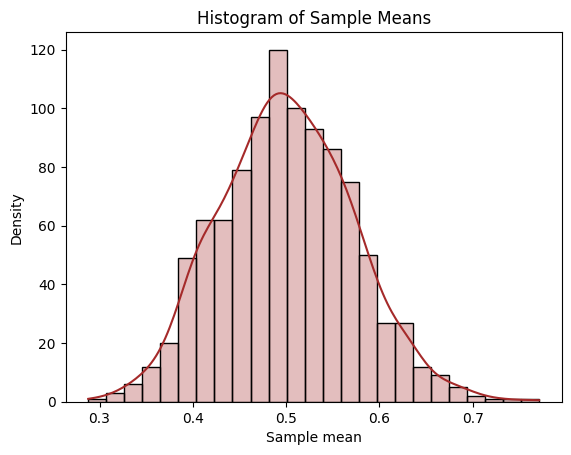

In [68]:
sns.histplot(sample_means, kde=True, color='brown', edgecolor='black', alpha=0.3)
plt.xlabel('Sample mean')
plt.ylabel('Density')
plt.title('Histogram of Sample Means')
plt.show()

In [42]:
print(skew(sample_means, axis=0, bias=True))

0.21680703897208653


In [64]:
1/lambda_param

0.5

In [70]:
(1/lambda_param**2) / 50

0.005

In [69]:
np.var(sample_means)

np.float64(0.005108931971519212)

In [5]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df['fare'].isna().sum()

0

<Axes: ylabel='Density'>

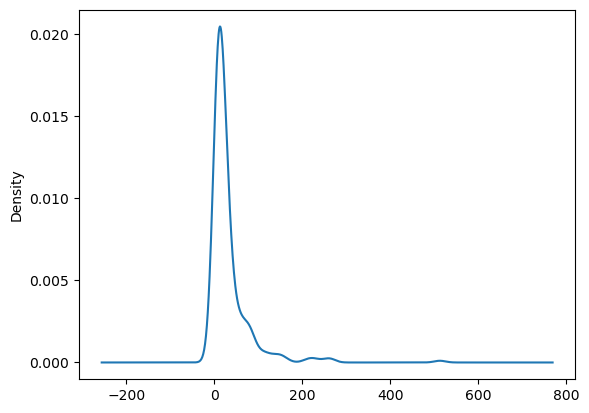

In [7]:
df['fare'].plot(kind='kde')

In [ ]:
# collecting 1000 samples of size 50 from fare
samples = []
for i in range(1000):
    sample = df['fare'].sample(50)
    samples.append(sample)

In [23]:
import numpy as np
samples = np.array(samples)

In [11]:
samples.shape

(1000, 50)

In [12]:

samples

array([[  9.825 ,   7.8292,  39.    , ...,  93.5   , 153.4625,   8.05  ],
       [ 13.    ,  27.7208,   4.0125, ...,  16.1   ,  55.    ,  56.4958],
       [ 15.9   ,   7.8792,   7.8958, ...,  16.1   ,   7.925 ,  31.275 ],
       ...,
       [ 11.1333,   8.6625,  15.2458, ...,   8.05  ,  11.1333,  39.6875],
       [  0.    ,  65.    ,   8.05  , ...,   7.0458,  13.    ,   0.    ],
       [ 13.    ,   7.2292,  15.5   , ...,  20.525 ,  27.9   ,  13.    ]])

In [24]:
sample_means = samples.mean(axis=1)
sample_means.shape

(1000,)

<Axes: ylabel='Density'>

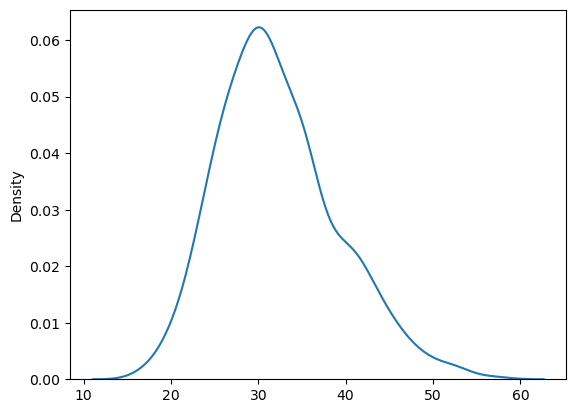

In [25]:
sns.kdeplot(sample_means)

In [28]:
df['fare'].mean(), df['fare'].std()

(32.204207968574636, 49.6934285971809)

In [ ]:
sample_means.mean(), sa
mple_means.std() * 50**0.5

(32.214951328, 48.41280953927524)

## Confidence interval

A **confidence interval** is a range of values within which a population parameter, such as the population mean, is estimated to lie with a certain level of confidence. The confidence interval provides an indication of the precision and uncertainty associated with the estimate. To interpret the confidence interval values, consider the following points: 

1. **Confidence level**: The confidence level (commonly set at 90%, 95%, or 99%) represents 
the probability that the confidence interval will contain the true population parameter if the sampling and estimation process were repeated multiple times. For example, a 95% confidence interval means that if you were to draw 100 different samples from the population and calculate the confidence interval for each, approximately 95 of those intervals would contain the true population parameter. 

2. **Interval range**: The width of the confidence interval gives an indication of the precision of 
the estimate. A narrower confidence interval suggests a more precise estimate of the population parameter, while a wider interval indicates greater uncertainty. The width of the interval depends on the sample size, variability in the data, and the desired level of confidence. 

3. **Interpretation**: To interpret the confidence interval values, you can say that you are "X% confident that the true population parameter lies within the range (lower limit, upper limit)."<p>
Keep in mind that this statement is about the interval, not the specific point estimate, and it refers to the confidence level you chose when constructing the interval

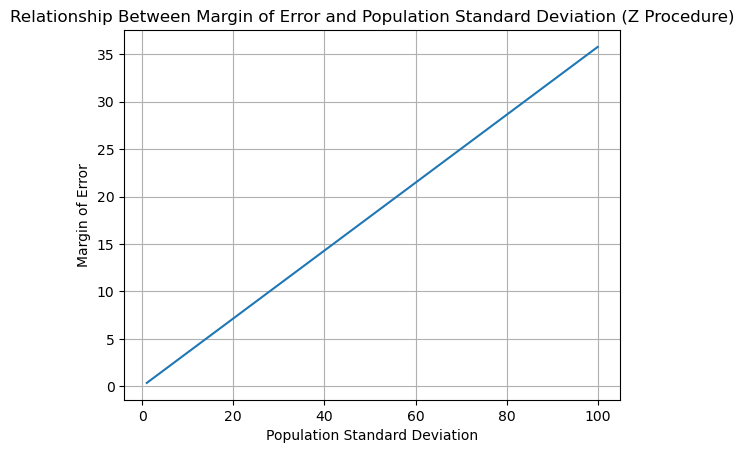

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set parameters
sample_size = 30
confidence_level = 95

# Calculate the critical value for the Z-score
critical_value = stats.norm.ppf((1 + confidence_level / 100) / 2)

# Generate an array of population standard deviations
population_std_devs = np.arange(1, 101)

# Calculate the margin of error for each population standard deviation
margin_of_errors = critical_value * (population_std_devs / np.sqrt(sample_size))

# Plot the relationship
plt.plot(population_std_devs, margin_of_errors)
plt.xlabel("Population Standard Deviation")
plt.ylabel("Margin of Error")
plt.title("Relationship Between Margin of Error and Population Standard Deviation (Z Procedure)")
plt.grid(True)
plt.show()

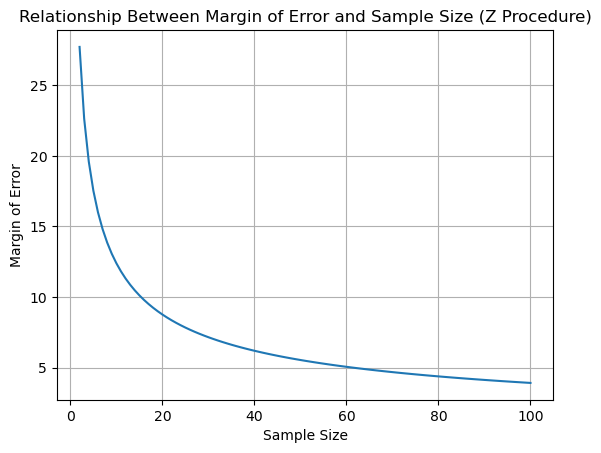

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set parameters
population_std_dev = 20
confidence_level = 95

# Calculate the critical value for the Z-score
critical_value = stats.norm.ppf((1 + confidence_level / 100) / 2)

# Generate an array of sample sizes
sample_sizes = np.arange(2, 101)

# Calculate the margin of error for each sample size
margin_of_errors = critical_value * (population_std_dev / np.sqrt(sample_sizes))

# Plot the relationship
plt.plot(sample_sizes, margin_of_errors)
plt.xlabel("Sample Size")
plt.ylabel("Margin of Error")
plt.title("Relationship Between Margin of Error and Sample Size (Z Procedure)")
plt.grid(True)
plt.show()

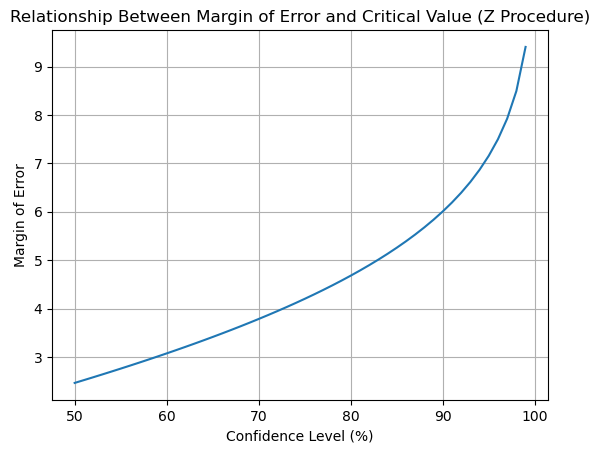

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set parameters
sample_size = 30
population_std_dev = 20

# Generate an array of confidence levels from 50% to 99%
confidence_levels = np.arange(50, 100)

# Calculate the critical values (Z-scores) for each confidence level
critical_values = stats.norm.ppf((1 + confidence_levels / 100) / 2)

# Calculate the margin of error for each critical value
margin_of_errors = critical_values * (population_std_dev / np.sqrt(sample_size))

# Plot the relationship
plt.plot(confidence_levels, margin_of_errors)
plt.xlabel("Confidence Level (%)")
plt.ylabel("Margin of Error")
plt.title("Relationship Between Margin of Error and Critical Value (Z Procedure)")
plt.grid(True)
plt.show()


### t test of independence

$$
t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$


In [7]:
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [ ]:
# Two sample t-test
# Input the data as lists
desktop_users = [12, 15, 18, 16, 20, 17, 14, 22, 19, 21, 23, 18, 25, 17, 16, 24, 20, 19, 22, 18, 15, 14, 23, 16, 12, 21, 19, 17, 20, 14]
mobile_users = [10, 12, 14, 13, 16, 15, 11, 17, 14, 16, 18, 14, 20, 15, 14, 19, 16, 15, 17, 14, 12, 11, 18, 15, 10, 16, 15, 13, 16, 11]

# Perform the Shapiro-Wilk test for both desktop and mobile users
shapiro_desktop = stats.shapiro(desktop_users)
shapiro_mobile = stats.shapiro(mobile_users)

print("Shapiro-Wilk test for desktop users:", shapiro_desktop.pvalue)
print("Shapiro-Wilk test for mobile users:", shapiro_mobile.pvalue)

Shapiro-Wilk test for desktop users: 0.7791003299808725
Shapiro-Wilk test for mobile users: 0.5791606602037616


In [ ]:
# Levene's test for equality of variances
stats.levene(desktop_users, mobile_users).

# If the p-value from Levene's test is greater than your chosen significance level (α = 0.05), you can assume equal variances.

np.float64(0.09153720526741761)

(<Axes: ylabel='Density'>, <Axes: ylabel='Density'>)

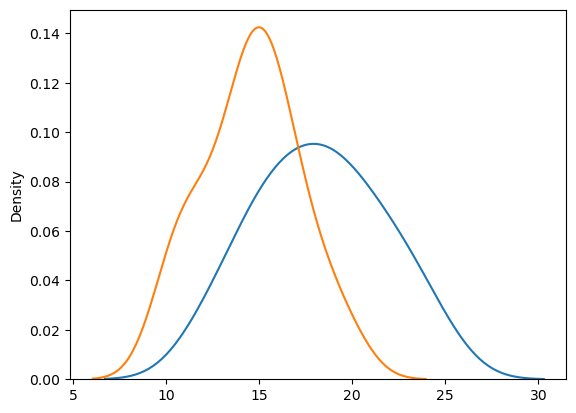

In [10]:
sns.kdeplot(desktop_users), sns.kdeplot(mobile_users)

In [18]:
np.array(mobile_users).std(ddof=1), np.array(mobile_users).mean()

(np.float64(2.595531084228313), np.float64(14.566666666666666))

In [ ]:
np.array(desktop_users).std(ddof=1), np.array(desktop_users).mean()

(np.float64(3.4808177134149085), np.float64(18.233333333333334))

In [21]:
stats.skew(mobile_users), stats.skew(desktop_users)

(np.float64(0.006855336053215975), np.float64(0.05543698165319389))

i.e., normally distributed

In [26]:
stats.ttest_ind(desktop_users, mobile_users).pvalue

np.float64(2.1422811334975257e-05)

rejecting null hypothesis as pval < 0.05

### t test with equal population variances
If the assumption of equal population variances holds (i.e., equal_var=True), we use the pooled variance:

$$
s_p^2 = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}
$$

$$
t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{s_p^2 \left( \frac{1}{n_1} + \frac{1}{n_2} \right)}}
$$

In [ ]:
# performing two samp t test on titanic data, checking mean age of male and female are same 

import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic = titanic[titanic.age.notna()]

In [3]:
titanic.sex.value_counts()

sex
male      453
female    261
Name: count, dtype: int64

In [ ]:
pop_male = titanic[(titanic.sex == 'male')]['age']
pop_female = titanic[(titanic.sex == 'female')]['age']

In [16]:
age_m, age_f = pop_male.sample(25), pop_female.sample(25)

In [18]:
# test for normality
stats.shapiro(age_m).pvalue>0.05, stats.shapiro(age_f).pvalue>0.05

(np.True_, np.True_)

In [20]:
# test for equal variances
stats.levene(age_f, age_m).pvalue > 0.05

np.True_

In [23]:
stats.ttest_ind(age_m, age_f, equal_var=False).pvalue

np.float64(0.5305851563650237)

In [22]:
pop_female.mean(), pop_male.mean()

(np.float64(27.915708812260537), np.float64(30.72664459161148))

In [26]:
pvals = []
for _ in range(100):
    sample_m = pop_male.sample(25, replace=False)
    sample_f = pop_female.sample(25, replace=False)
    pval = stats.ttest_ind(sample_m, sample_f, equal_var=False).pvalue
    pvals.append(pval)

# % of p-values below 0.05
np.mean(np.array(pvals)), np.mean(np.array(pvals) < 0.05)

(np.float64(0.40939344007717443), np.float64(0.13))

In [34]:
# counting pvals where > 0.05
np.count_nonzero(np.array(pvals) > 0.05), np.count_nonzero(np.array(pvals) < 0.05)

(87, 13)

In [27]:
# A p-value tells you whether the difference is statistically significant — but not how large it is.
def cohens_d(a, b):
    return (a.mean() - b.mean()) / np.sqrt((a.std(ddof=1) ** 2 + b.std(ddof=1) ** 2) / 2)

cohens_d(age_m, age_f)

np.float64(0.1786699846949778)

In [ ]:
# paired t test

before = np.array([80, 92, 75, 68, 85, 78, 73, 90, 70, 88, 76, 84, 82, 77, 91])
after = np.array([78, 93, 81, 67, 88, 76, 74, 91, 69, 88, 77, 81, 80, 79, 88])

diff = before - after

In [10]:
stats.shapiro(diff).pvalue

np.float64(0.2070477898690044)

<Axes: ylabel='Density'>

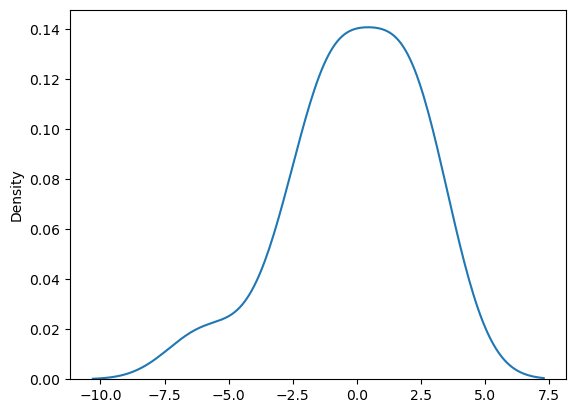

In [4]:
sns.kdeplot(diff)

In [5]:
stats.skew(diff)

np.float64(-0.781825615208872)

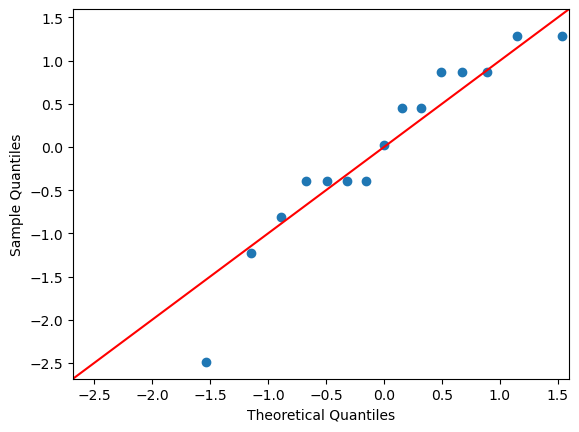

In [6]:
import statsmodels.api as sm
sm.qqplot(diff, line='45', fit=True)
plt.show()

In [4]:
mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof=1)
mean_diff, std_diff

(np.float64(-0.06666666666666667), np.float64(2.4630604269214893))

In [5]:
n = len(diff)
t_stat = mean_diff / (std_diff / np.sqrt(n))

In [8]:
print(t_stat)

-0.10482848367219182


In [13]:
df = n - 1
alpha = 0.5
stats.t.cdf(t_stat, df)

np.float64(0.45899948531425433)

i.e, accepting null hypothesis.

### Chi square distribution

The chi-squared distribution is derived from the sum of squares of standard normal random variables. Each degree of freedom corresponds to a squared standard normal random variable. 

The Chi-Square distribution, also written as $\chi^2$ distribution, is a continuous probability distribution that is widely used in statistical hypothesis testing, particularly in the context of goodness-of-fit tests and tests for independence in
contingency tables. 

It arises when the sum of the squares of independent standard normal random variables follows this distribution.

The Chi-Square distribution has a single parameter, the degrees of freedom (df),
which influences the shape and spread of the distribution. The degrees of
freedom are typically associated with the number of independent variables or
constraints in a statistical problem.

Some key properties of the Chi-Square distribution are:

    a. It is a continuous distribution, defined for non-negative values.

    b. It is positively skewed, with the degree of skewness decreasing as the degrees of freedom increase.

    c. The mean of the Chi-Square distribution is equal to its degrees of freedom, and its variance is equal to twice the degrees of freedom.

    d. As the degrees of freedom increase, the Chi-Square distribution approaches the normal distribution in shape.

The Chi-Square distribution is used in various statistical tests, such as 

> the Chi-Square goodness-of-fit test, which evaluates whether an observed frequency distribution fits an expected theoretical distribution, 

> and the Chi-Square test for independence, which checks the association between categorical variables in a
contingency table.


In [19]:
sample1 = np.random.normal(0,1, 1000)
sample2 = np.random.normal(0,1, 1000)
sample3 = np.random.normal(0,1, 1000)
sample4 = np.random.normal(0,1, 1000)
sample5 = np.random.normal(0,1, 1000)

In [20]:
u = sample1**2
v = sample1**2 + sample2**2
w = sample1**2 + sample2**2 + sample3**2
x = sample1**2 + sample2**2 + sample3**2 + sample4**2
y = sample1**2 + sample2**2 + sample3**2 + sample4**2 + sample5**2

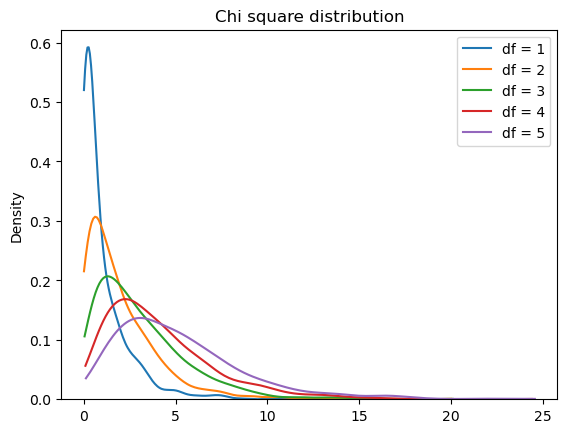

In [21]:
sns.kdeplot(u, clip=(u.min(), u.max()), label='df = 1')
sns.kdeplot(v, clip=(v.min(), v.max()), label='df = 2')
sns.kdeplot(w, clip=(w.min(), w.max()), label='df = 3')
sns.kdeplot(x, clip=(x.min(), x.max()), label='df = 4')
sns.kdeplot(y, clip=(y.min(), y.max()), label='df = 5')

plt.title("Chi square distribution")
plt.legend()
plt.show()

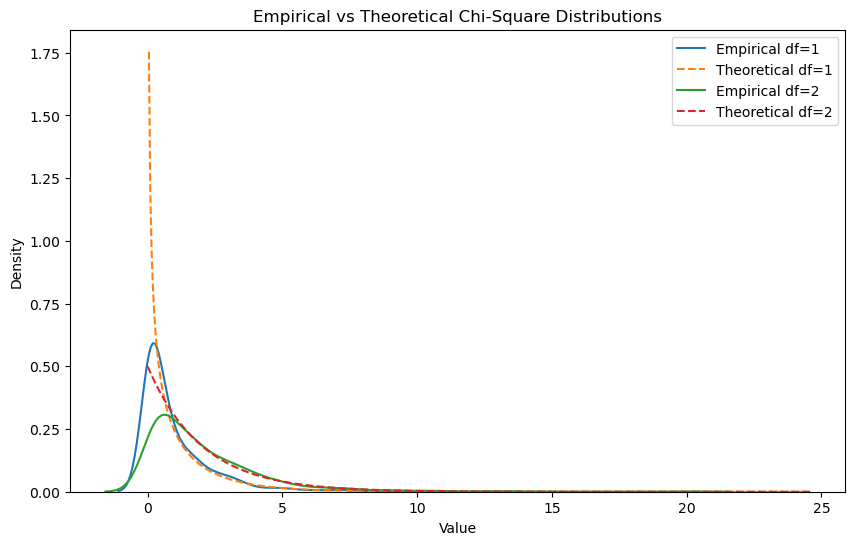

In [22]:
from scipy.stats import chi2

x_vals = np.linspace(0, max(y), 500)
plt.figure(figsize=(10,6))

sns.kdeplot(u, label='Empirical df=1')
plt.plot(x_vals, chi2.pdf(x_vals, df=1), label='Theoretical df=1', linestyle='--')

sns.kdeplot(v, label='Empirical df=2')
plt.plot(x_vals, chi2.pdf(x_vals, df=2), label='Theoretical df=2', linestyle='--')

# Add for w (df=3), x (df=4), y (df=5) similarly...

plt.title("Empirical vs Theoretical Chi-Square Distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()


In [10]:
np.zeros(100)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

998.9980149621002 1923.2968644511463


<Axes: ylabel='Density'>

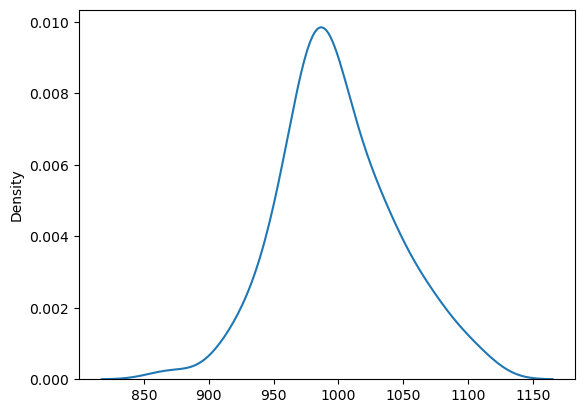

In [24]:
# taking 100 samples i.e., df = 100 anmd checking if chi2 approximated normal distribution or not
import numpy as np
sample = np.zeros(100)
for i in range(1000):
    # Generate a random sample from the population
    x = np.random.normal(0, 1, 100)
    sample += x**2

print(sample.mean(), sample.var())
sns.kdeplot(sample)
    

so, rejecting null hypothesis i.e., both columns have significant association 